# Testing Hypotheses About Red Wine Dataset from Kaggle:

The dataset is available at: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009; uploaded by: UCI Machine Learning.

Before we start modeling, let's have a general overview of the data to understand key patterns.

In [207]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import levene

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
file_path = path + "/winequality-red.csv"
df = pd.read_csv(file_path, sep=",")
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


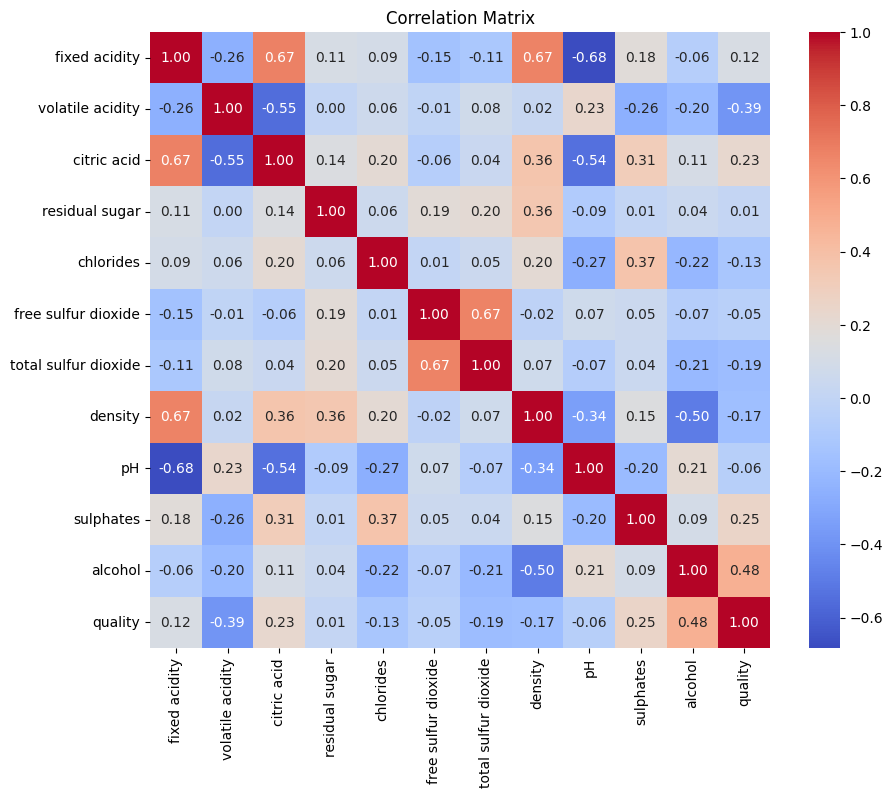

In [183]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# hypotheses

## What Is the Probability That These Samples Are Valid?

Let's suppose I receive a new sample with a mean value of Fixed Acidity: 8, Volatile Acidity: 0.55, and Citric Acid: 0.27. What is the probability that this new sample is incorrect based on the data?

In [184]:
fixed_acidity = df["fixed acidity"]
print('Average of actual fixed acidity data:',fixed_acidity.mean())

volatile_acidity = df["volatile acidity"]
print('Average of actual volatile acidity data:',volatile_acidity.mean())

citric_acidity = df["citric acid"]
print('Average of actual citric acid data:',citric_acidity.mean())

Average of actual fixed acidity data: 8.31963727329581
Average of actual volatile acidity data: 0.5278205128205128
Average of actual citric acid data: 0.2709756097560976


hypotheses:

ztest test

1. Fixed Acidity:

- h0: μ = 8
- h1: μ ≠ 8

2. Volatile Acidity:

- h0: μ = 0.55
- h1: μ ≠ 0.55

3. Citric Acid:

- h0: μ = 0.28
- h1: μ ≠ 0.28


In [185]:
stats_fixed, p_value_fixed = ztest(x1 = df["fixed acidity"], value=8, alternative= 'two-sided')
stats_volatile, p_value_volatile = ztest(x1 = df["volatile acidity"], value=0.55, alternative= 'two-sided')
stats_citric, p_value_citric = ztest(x1 = df["citric acid"], value=0.28, alternative= 'two-sided')

In [186]:
print(f'p-value fixed acidity: {p_value_fixed}\n')
print(f'p-value volatile acidity: {p_value_volatile}\n')
print(f'p-value citric acid: {p_value_citric}')

p-value fixed acidity: 2.1190668256679101e-13

p-value volatile acidity: 7.303710171055404e-07

p-value citric acid: 0.06395871201007197


In [187]:
def result(p_value):
    if p_value < 0.05:
        conclusion = f"Reject the null hypothesis about"
    else:
        conclusion = f"Fail to reject the null hypothesis about"
    return conclusion

print(result(p_value_fixed), "fixed acidity")
print(result(p_value_volatile), "volatile acidity")
print(result(p_value_citric), "citric acid")

Reject the null hypothesis about fixed acidity
Reject the null hypothesis about volatile acidity
Fail to reject the null hypothesis about citric acid


Result of hypotheses:

1. Fixed Acidity:

- h1: μ ≠ 8

2. Volatile Acidity:

- h1: μ ≠ 0.55

3. Citric Acid:

- h0: μ = 0.28

Only the citric acid is likely valid.

Let's create a confidence interval, so we don't need to analyze the data about it again.

In [188]:
confidence_fixed = stats.norm.interval(0.95, loc=df['fixed acidity'].mean(), scale=df['fixed acidity'].std()/np.sqrt(len(df)))
confidence_volatile = stats.norm.interval(0.95, loc=df['volatile acidity'].mean(), scale=df['volatile acidity'].std()/np.sqrt(len(df)))
confidence_citric = stats.norm.interval(0.95, loc=df['citric acid'].mean(), scale=df['citric acid'].std()/np.sqrt(len(df)))

print(f'Confidence Interval for Fixed Acidity: {confidence_fixed}\n')
print(f'Confidence Interval for Volatile Acidity: {confidence_volatile}\n')
print(f'Confidence Interval for Citric Acid: {confidence_citric}')

Confidence Interval for Fixed Acidity: (np.float64(8.234298448816283), np.float64(8.404976097775336))

Confidence Interval for Volatile Acidity: (np.float64(0.5190440054527028), np.float64(0.5365970201883228))

Confidence Interval for Citric Acid: (np.float64(0.26142754518301214), np.float64(0.280523674329183))


## Do sulphate levels impact to quality?

In [189]:
quality = df['quality']
sulphates = df['sulphates']

Let's see the data distribution to get an idea

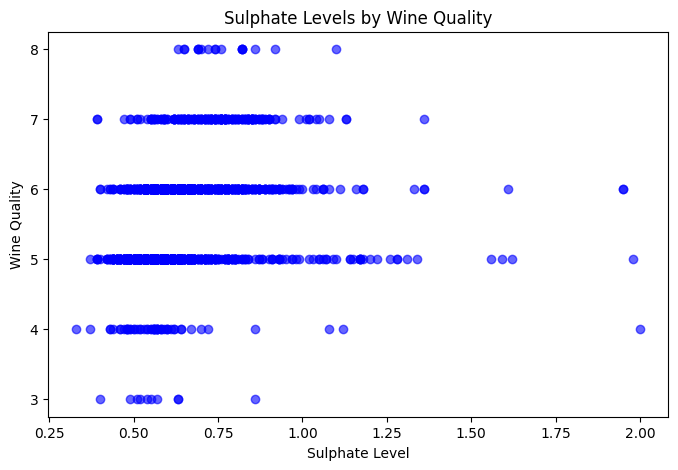

In [190]:
plt.figure(figsize=(8,5))
plt.scatter( df['sulphates'],df['quality'], alpha=0.6, color='blue')

plt.ylabel('Wine Quality')
plt.xlabel('Sulphate Level')
plt.title('Sulphate Levels by Wine Quality')
plt.show()

Just by looking at the graph, we can say that sulphate levels may impact quality, but let's run the test.

hypothese:

pearsonr test

- h0: r = 0 (Not exist correlation)
- h1: r ≠ 0 (Exist correlation)


In [191]:
correlation_sulphate, p_value_sulphate = pearsonr(sulphates, quality)

In [192]:
print(f'correlation sulphates: {correlation_sulphate}')
print(f'p-value: {p_value_sulphate}')

correlation sulphates: 0.25139707906926134
p-value: 1.8020884534524085e-24


In [193]:
print(f'{result(p_value_sulphate)} about sulphates')

Reject the null hypothesis about about sulphates


Conclusion: There is a weak positive correlation between sulfate levels and quality, and this correlation is statistically significant, the p-value of 1.802e-24 is so small that you can say with high confidence that the correlation between sulfate and quality did not occur by chance.

h1: r ≠ 0 (Exist correlation)

## What is the influence of pH categories on the quality categories?


In [194]:
df_cat = df.copy()

df_cat.loc[df_cat['pH'] <= 3.05, 'pH_cat'] = 'Acid pH'
df_cat.loc[(df_cat['pH'] > 3.05) & (df_cat['pH'] <= 3.20), 'pH_cat'] = 'Neutral pH'
df_cat.loc[df_cat['pH'] > 3.20, 'pH_cat'] = 'Less acid pH'

df_cat.loc[df_cat['quality'] <= 4, 'quality_cat'] = 'Low quality'
df_cat.loc[(df_cat['quality'] > 4) & (df_cat['quality'] <= 6), 'quality_cat'] = 'Medium quality'
df_cat.loc[df_cat['quality'] > 6, 'quality_cat'] = 'High quality'

crosstable_cat = pd.crosstab(df_cat['pH_cat'], df_cat['quality_cat'])
crosstable_cat

quality_cat,High quality,Low quality,Medium quality
pH_cat,,,
Acid pH,15,2,55
Less acid pH,156,56,999
Neutral pH,46,5,265


hypothese:

chi2_contingency test

- h0: The variables are independent.
- h1: The variables are dependent.

In [195]:
chi2, p_value_chi, dof, expected = chi2_contingency(crosstable_cat)
print("Chi-square:", chi2)
print("p-value:", p_value_chi)

Chi-square: 9.989565432273091
p-value: 0.04060381819864933


In [196]:
print(f'{result(p_value_chi)} about pH category vs. quality category')

Reject the null hypothesis about about pH category vs. quality category


There is a statistically significant association between pH levels and product quality. This indicates that quality is not randomly distributed across different pH levels.

h1: The variables are dependent.

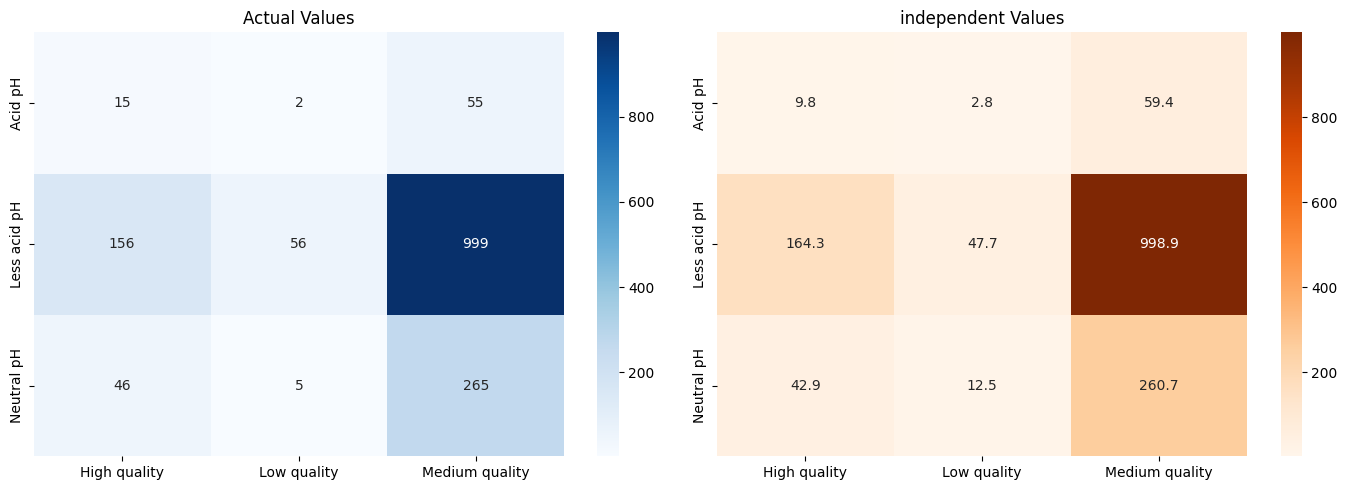

In [197]:
expected_df = pd.DataFrame(expected, index=crosstable_cat.index, columns=crosstable_cat.columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(crosstable_cat, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Actual Values')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Oranges', ax=axs[1])
axs[1].set_title('independent Values')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Do Wines With Lower Chlorides Have Better Quality?

To test this, I'll separate the chlorides column into low and high groups to use in the ttest_ind

In [206]:
threshold = df['chlorides'].median()

low_chlorides = df[df['chlorides'] < threshold]['quality']
high_chlorides = df[df['chlorides'] >= threshold]['quality']

hypothese:

ttest_ind test

- H₀: μ₁ = μ₂
- H₁: μ₁ ≠ μ₂


In [199]:
t_stat_chlorides, p_value_chlorides = ttest_ind(low_chlorides, high_chlorides)

print(f'T-statistic: {t_stat_chlorides}')
print(f'P-value: {p_value_chlorides}')

T-statistic: 6.752824180089684
P-value: 2.0236904467109983e-11


In [200]:
print(f'{result(p_value_chlorides)} Chlorides')

Reject the null hypothesis about Chlorides


h1: μ₁ ≠ μ₂


To see the correlation, let's do a pearson test

hypothese:

pearsonr test

- h0: r = 0 (Not exist correlation)
- h1: r ≠ 0 (Exist correlation)

In [201]:
correlation_chlorides, p_value_chlorides_pearsonr = pearsonr(df['chlorides'], df['quality'])
print(f'correlation chlorides statistic: {correlation_chlorides}')
print(f'P-value: {p_value_chlorides_pearsonr}')

correlation chlorides statistic: -0.12890655993005268
P-value: 2.3133826540584222e-07


In [202]:
print(f'{result(p_value_chlorides_pearsonr)} Chlorides')

Reject the null hypothesis about Chlorides


r ≠ 0 (Exist correlation)

Conclusion: There is a correlation between lower chlorides and better quality. The correlation is weak and negative, and the p-value is statistically significant.

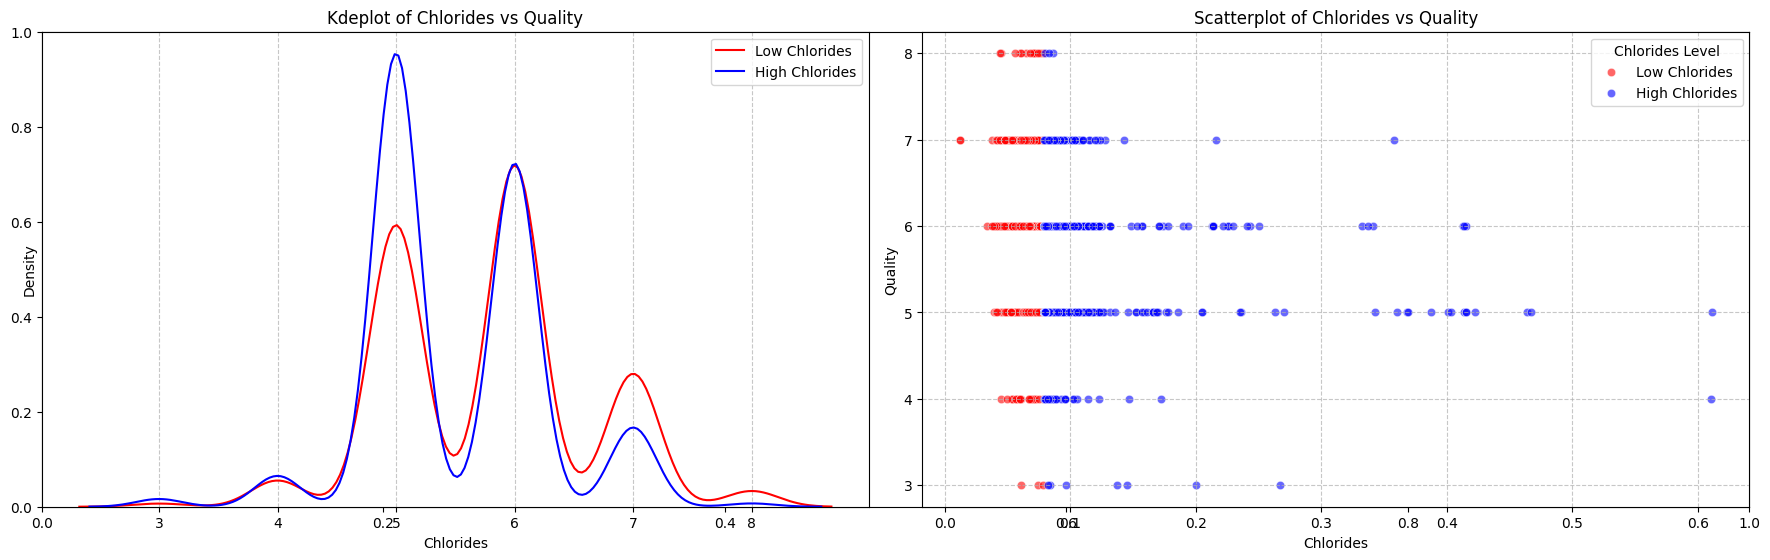

In [203]:
plt.subplots(figsize=(18, 6))

plt.subplot(122)
sns.scatterplot(x=df[df['chlorides'] < threshold]['chlorides'], y=df[df['chlorides'] < threshold]['quality'], color='red', label='Low Chlorides', alpha=0.6)
sns.scatterplot(x=df[df['chlorides'] >= threshold]['chlorides'], y=df[df['chlorides'] >= threshold]['quality'], color='blue', label='High Chlorides', alpha=0.6)
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.title('Scatterplot of Chlorides vs Quality')
plt.legend(title='Chlorides Level')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(121)
sns.kdeplot(low_chlorides, color='red', label='Low Chlorides')
sns.kdeplot(high_chlorides, color='blue', label='High Chlorides')
plt.xlabel('Chlorides')
plt.title("Kdeplot of Chlorides vs Quality")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_ticks([])
plt.tight_layout()
plt.show()

## Does homogeneity of variances exist between low and high density?

hypothese:

levene test

- h0: The variances between the groups are equal.
- h1: The variances between the groups are not equal.

In [208]:
low_density = df[df['density'] <= df['density'].median()]['quality']
high_density = df[df['density'] > df['density'].median()]['quality']

stat_density, p_value_density = levene(low_density, high_density)

print(f'Statistic: {stat_density}')
print(f'p-value: {p_value_density}')

Statistic: 0.08436932029945657
p-value: 0.7714990204366308


In [218]:
print(f'{result(p_value_density)} density')

Fail to reject the null hypothesis about density


- h0: The variances between the groups are equal.

Conclusion: There is no significant difference in the scatter of quality between the groups.

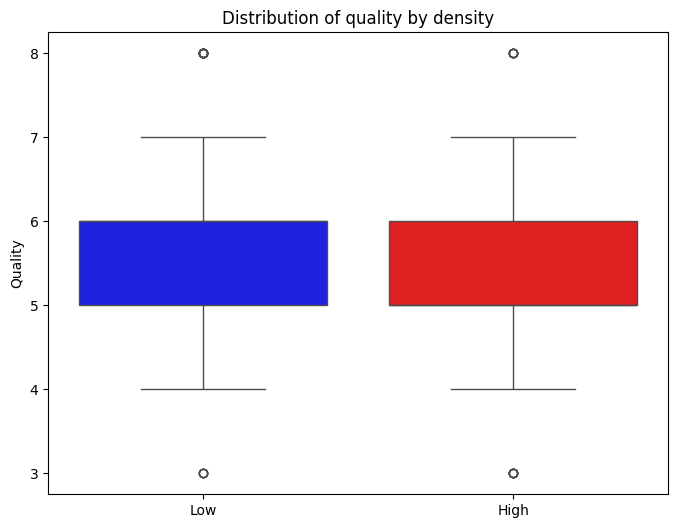

In [217]:
df_density = pd.DataFrame({'Quality': pd.concat([low_density, high_density]),'Group': ['Low'] * len(low_density) + ['High'] * len(high_density)})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Quality', data=df_density, hue='Group', palette={"Low": "blue", "High": "red"}, legend=False)
plt.title('Distribution of quality by density')
plt.xlabel('')
plt.ylabel('Quality')
plt.show()